# Requirment (1/1)

In [2]:
import random
import re
import math

%load_ext autoreload
%autoreload 2


In [10]:
def string2func(string):
    replacements = {
        '^': '**',
        'e': str(math.exp(1)),
        'PI': str(math.pi)
    }
    allowedWords = [
        'x',
        'e'
    ]
    for word in re.findall('[a-zA-Z_]+', string):
        if word not in allowedWords:
            raise ValueError(
                '"{}" is forbidden to use in math expression'.format(word)
            )

    for old, new in replacements.items():
        string = string.replace(old, new)

    def func(x):
        return eval(string)

    return func


In [5]:


def monte_carlo(n, a, b, fx):
    sum_of_samples = 0
    for i in range(n):
        x = (b - a) * random.uniform(0, 1) + a
        sum_of_samples += fx(x)

    return (b - a) * float(sum_of_samples/n)


In [11]:

n = int(input("Enter the number of samples(n): "))   
a = float(input("Enter the lower range(a): "))
b = float(input("Enter the upper range(b): "))
fx = string2func(input("Enter the function (fx): "))
print(monte_carlo(n, a, b, fx))
#(15*x^3 + 21*x^2 + 41*x +3)**(1/4.0) * e^(-0.5*x)
    


2.718281828459045
4.05053655919342


## How to input the functions
1- run the cell above.

2- enter first n than a than b than the function.

### Note: the function in the pptx file you can copy paste it from the comment at the end of the cell 



2- enter first n than a than b than the function.

### note: the function in the pptx file you can copy paste it from the comment at the end of the cell 


# Requirment(1/2)

In [12]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt


## Best value for n
we will choose 6500 so it will no do much calculation and the noise is acceptable on it

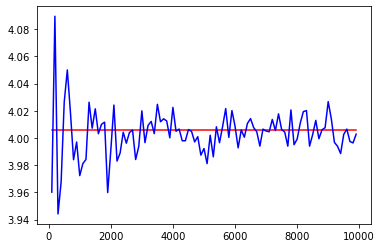

In [13]:
integral = integrate.quad(fx, a, b)
x = []
y_exact = []
y_approx = []

for n in range (100, 10000, 100):
    y_exact.append(integral[0])
    y_approx.append(monte_carlo(n, a, b, fx))
    x.append(n)

plt.plot(x, y_exact, 'r')
plt.plot(x, y_approx, 'b')

# Requirment 2

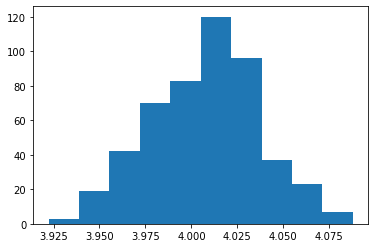

In [14]:
monte_carlo_res = []
a = 1
b = 4
n = 1000
for i in range(0,500):
    monte_carlo_res.append(monte_carlo(n, a, b, fx))
plt.hist(monte_carlo_res)
length = len(monte_carlo_res)
mean = sum(monte_carlo_res) / length
deviations = [(x - mean) ** 2 for x in monte_carlo_res]
variance = sum(deviations) / length
std_dev = math.sqrt(variance)


## Does it follow a normal distribution?
Yes as the graph says

In [17]:
print("The standard deviation is equal to " + str(std_dev))


The standard deviation is equal to 0.02976273674308516
